In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

1.9.0


In [5]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(
    num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

In [6]:
print (train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


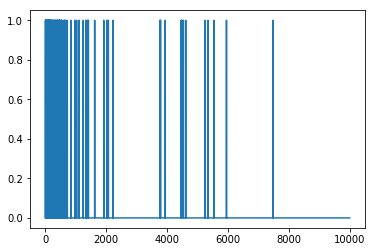

In [7]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

plt.plot(train_data[0])

In [11]:
def create_model(nuerons=16):
    model = keras.Sequential()
    model.add(keras.layers.Dense(nuerons,
                                 activation=tf.nn.relu, input_shape=(NUM_WORDS,)))
    model.add(keras.layers.Dense(nuerons,
                                 activation=tf.nn.relu))
    model.add(keras.layers.Dense(1, 
                                 activation=tf.nn.sigmoid))
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])
    return model
    
    

In [12]:
baseline_model = create_model(16)
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.5244 - acc: 0.7690 - binary_crossentropy: 0.5244 - val_loss: 0.3583 - val_acc: 0.8753 - val_binary_crossentropy: 0.3583
Epoch 2/20
 - 7s - loss: 0.2588 - acc: 0.9086 - binary_crossentropy: 0.2588 - val_loss: 0.2860 - val_acc: 0.8875 - val_binary_crossentropy: 0.2860
Epoch 3/20
 - 8s - loss: 0.1815 - acc: 0.9362 - binary_crossentropy: 0.1815 - val_loss: 0.2916 - val_acc: 0.8841 - val_binary_crossentropy: 0.2916
Epoch 4/20
 - 8s - loss: 0.1417 - acc: 0.9519 - binary_crossentropy: 0.1417 - val_loss: 0.3213 - val_acc: 0.8789 - val_binary_crossentropy: 0.3213
Epoch 5/20
 - 9s - loss: 0.1148 - acc: 0.9626 - binary_crossentropy: 0.1148 - val_loss: 0.3507 - val_acc: 0.8731 - val_binary_crossentropy: 0.3507
Epoch 6/20
 - 7s - loss: 0.0919 - acc: 0.9720 - binary_crossentropy: 0.0919 - val_loss: 0.3868 - val_acc: 0.8694 - val_binary_crossentropy: 0.3868
Epoch 7/20
 - 7s - loss: 0.0733 - acc: 0.9799 - binary_crossentropy

In [14]:
smaller_model = create_model(4)
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [15]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.5412 - acc: 0.7913 - binary_crossentropy: 0.5412 - val_loss: 0.4254 - val_acc: 0.8592 - val_binary_crossentropy: 0.4254
Epoch 2/20
 - 6s - loss: 0.3385 - acc: 0.8917 - binary_crossentropy: 0.3385 - val_loss: 0.3344 - val_acc: 0.8786 - val_binary_crossentropy: 0.3344
Epoch 3/20
 - 8s - loss: 0.2596 - acc: 0.9140 - binary_crossentropy: 0.2596 - val_loss: 0.2990 - val_acc: 0.8869 - val_binary_crossentropy: 0.2990
Epoch 4/20
 - 8s - loss: 0.2159 - acc: 0.9292 - binary_crossentropy: 0.2159 - val_loss: 0.2875 - val_acc: 0.8869 - val_binary_crossentropy: 0.2875
Epoch 5/20
 - 7s - loss: 0.1870 - acc: 0.9393 - binary_crossentropy: 0.1870 - val_loss: 0.2871 - val_acc: 0.8852 - val_binary_crossentropy: 0.2871
Epoch 6/20
 - 6s - loss: 0.1651 - acc: 0.9459 - binary_crossentropy: 0.1651 - val_loss: 0.2873 - val_acc: 0.8858 - val_binary_crossentropy: 0.2873
Epoch 7/20
 - 6s - loss: 0.1476 - acc: 0.9534 - binary_crossentropy:

In [16]:
bigger_model = create_model(128)
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


In [17]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 15s - loss: 0.3662 - acc: 0.8473 - binary_crossentropy: 0.3662 - val_loss: 0.2891 - val_acc: 0.8854 - val_binary_crossentropy: 0.2891
Epoch 2/20
 - 12s - loss: 0.1775 - acc: 0.9344 - binary_crossentropy: 0.1775 - val_loss: 0.3448 - val_acc: 0.8694 - val_binary_crossentropy: 0.3448
Epoch 3/20
 - 12s - loss: 0.1234 - acc: 0.9568 - binary_crossentropy: 0.1234 - val_loss: 0.3824 - val_acc: 0.8704 - val_binary_crossentropy: 0.3824
Epoch 4/20
 - 14s - loss: 0.0745 - acc: 0.9750 - binary_crossentropy: 0.0745 - val_loss: 0.4706 - val_acc: 0.8610 - val_binary_crossentropy: 0.4706
Epoch 5/20
 - 13s - loss: 0.0354 - acc: 0.9910 - binary_crossentropy: 0.0354 - val_loss: 0.5545 - val_acc: 0.8580 - val_binary_crossentropy: 0.5545
Epoch 6/20
 - 13s - loss: 0.0120 - acc: 0.9981 - binary_crossentropy: 0.0120 - val_loss: 0.6382 - val_acc: 0.8611 - val_binary_crossentropy: 0.6382
Epoch 7/20
 - 14s - loss: 0.0034 - acc: 0.9998 - binary_crosse

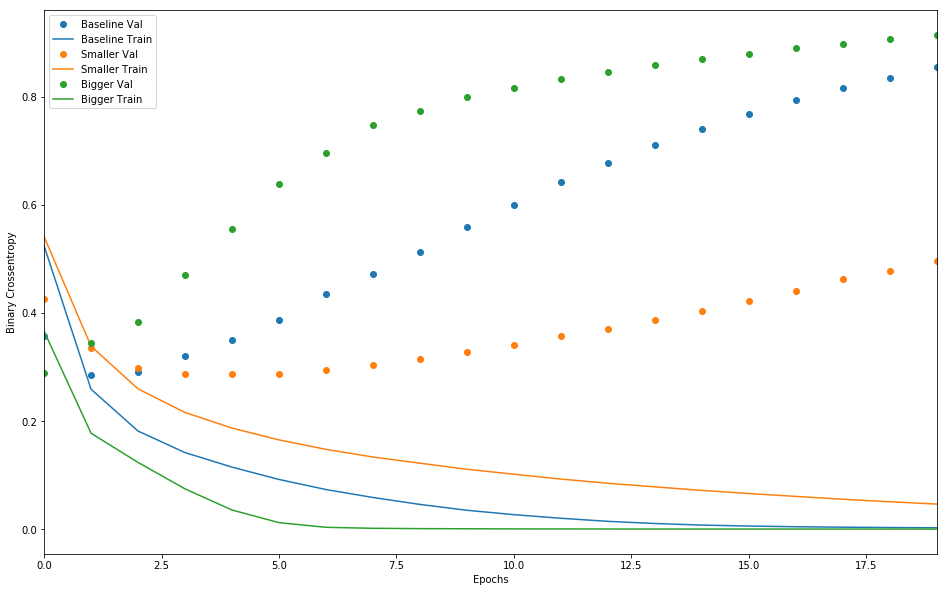

In [26]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch,
                       history.history['val_'+key],
                       'o',
                       label=name.title()+' Val')
        plt.plot(history.epoch,
                 history.history[key], 
                 color=val[0].get_color(), 
                 label=name.title()+' Train')
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', ' ').title())
        plt.legend()
        
        plt.xlim([0, max(history.epoch)])
        
plot_history([
    ('baseline', baseline_history),
    ('smaller', smaller_history),
    ('bigger', bigger_history)
])